<a href="https://colab.research.google.com/github/Rishardmunene/Stable-Diffusion-test/blob/SDXL/Refined_trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch torchvision accelerate diffusers transformers PIL tqdm

ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL


In [2]:
# Cell 1: Import Libraries and Setup Paths
import os
import numpy as np
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define the root directory and image folder
root_dir = os.getcwd()
image_dir = os.path.join(root_dir, 'training_images')

# Check if the training_images folder exists
if not os.path.exists(image_dir):
    os.makedirs(image_dir)
    raise ValueError(f"The folder 'training_images' was not found. An empty one has been created: {image_dir}")


In [3]:

image_files = list(Path(image_dir).glob('*.jpg')) + list(Path(image_dir).glob('*.png'))
if len(image_files) == 0:
    raise ValueError(f"No training images found in {image_dir}")

print(f"Found {len(image_files)} images in the folder.")

# Load and preprocess images
image_size = (64, 64)
images = []
for img_path in image_files:
    img = load_img(img_path, target_size=image_size)
    img_array = img_to_array(img) / 255.0
    images.append(img_array)

images = np.array(images)
print(f"Image dataset shape: {images.shape}")


Found 20 images in the folder.
Image dataset shape: (20, 64, 64, 3)


In [5]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape

# Assuming image_size is (64, 64)
image_size = (64, 64)
input_dim = np.prod(image_size) * 3  # 64 * 64 * 3 = 12288

model = Sequential([
    Flatten(),  # Remove input_shape here since it'll be inferred
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(input_dim, activation='sigmoid'),
    Reshape(image_size + (3,))  # Reshape back to original image dimensions (64, 64, 3)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(images, images, epochs=10, batch_size=4)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0921
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0655 
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0514 
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0512 
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0465 
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0480 
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0445 
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0447 
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0403 
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0375 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


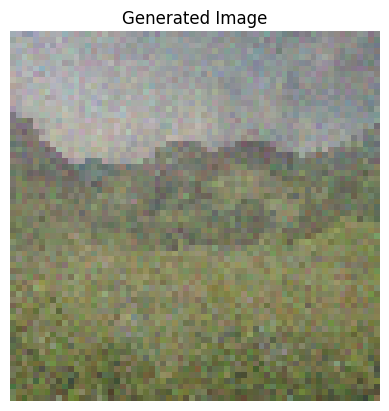

Generated image saved to /content/generated_image.png


In [6]:

random_input = np.random.rand(1, *image_size, 3)  # Random noise
generated_image = model.predict(random_input)

# Reshape the generated image back to its original dimensions
generated_image = generated_image.reshape(image_size + (3,))

# Visualize the generated image
plt.imshow(generated_image)
plt.axis('off')
plt.title("Generated Image")
plt.show()

# Save the generated image
output_path = os.path.join(root_dir, 'generated_image.png')
Image.fromarray((generated_image * 255).astype('uint8')).save(output_path)
print(f"Generated image saved to {output_path}")